In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
# Load the dataset
df = pd.read_csv('fuel_consumption_dataset.csv')

# Display the first few rows to check the data
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [3]:
print("Shape of dataset:", df.shape)      # rows, columns
print("\nColumns in dataset:\n", df.columns)

print("\nBasic statistics:\n", df.describe())  # summary of numerical data

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Shape of dataset: (1067, 13)

Columns in dataset:
 Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

Basic statistics:
        MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB 

In [ ]:
features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']
x = df[features]
target = 'CO2EMISSIONS'
y = df[target]
print("Features (x):")
print(x.head(10))
print("\nTarget (y):")
print(y.head(10))

Features (x):
   ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB
0         2.0          4                   8.5
1         2.4          4                   9.6
2         1.5          4                   5.9
3         3.5          6                  11.1
4         3.5          6                  10.6
5         3.5          6                  10.0
6         3.5          6                  10.1
7         3.7          6                  11.1
8         3.7          6                  11.6
9         2.4          4                   9.2

Target (y):
0    196
1    221
2    136
3    255
4    244
5    230
6    232
7    255
8    267
9    212
Name: CO2EMISSIONS, dtype: int64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Training set size: {x_train.shape[0]} samples")
print(f"Testing set size: {x_test.shape[0]} samples")

Training set size: 853 samples
Testing set size: 214 samples


In [6]:
# Create the model instance
model = LinearRegression()

# Train the model using the training data
model.fit(x_train, y_train)

print("Model training complete.")

Model training complete.


In [7]:
# Use the trained model to make predictions on the test set
y_pred = model.predict(x_test)

# Display the first 5 predictions alongside the actual values
print("First 5 Predictions:", y_pred[:5])
print("First 5 Actual Values:", y_test.values[:5])

First 5 Predictions: [302.95237705 240.91489956 272.50244127 235.31017981 204.07702562]
First 5 Actual Values: [304 221 294 221 207]


In [8]:
# Calculate the performance metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"--- Model Performance ---")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

--- Model Performance ---
R-squared (R²): 0.8760
Mean Absolute Error (MAE): 16.7216
Root Mean Squared Error (RMSE): 22.6463


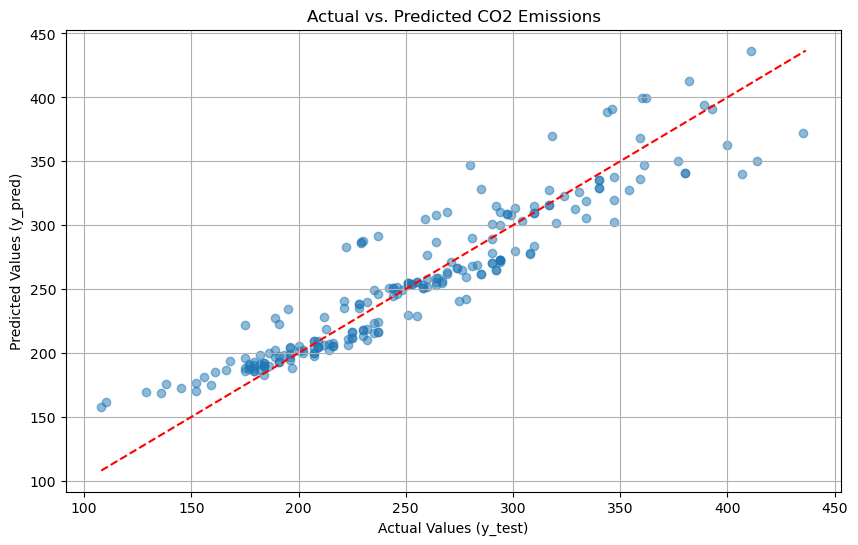

In [9]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a reference line (perfect prediction line)
# We find the min and max values to set the line's limits
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

# Add labels and title
plt.title('Actual vs. Predicted CO2 Emissions')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.grid(True)
plt.show()

In [11]:
# See the importance of each feature

coefficients = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
print("Model Intercept:", model.intercept_)
print("\nFeature Coefficients:\n")
print(coefficients)


Model Intercept: 67.34838518362102

Feature Coefficients:

                      Coefficient
ENGINESIZE              11.209439
CYLINDERS                7.155614
FUELCONSUMPTION_COMB     9.520812
